# IMPORTED NECESSARY LIBRARIES & EXPLORED THE DATA STRUCTURE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Data Set.xlsx")
df.head()

,TYPE,LIFESTYLE,PRODUCT,PRODUCT CODE,DATE,COLOUR,PATTERN,FIT,MATERIAL,SIZE,...,COLLAR,UNIQUE,SELLING PRICE,COST PRICE,QTY,PROMOTION,GROSS AMOUNT,DISCOUNT %,DISCOUNT AMOUNT,NET AMOUNT
0,BASIC,Formal wear,Shirt,202440147,2023-01-01,WHITE,41515,SLIM FIT,POLYCOTTON,14.5,...,CLASSIC,BASIC WHITE LONG SLEEVE SLIM FIT SHIRT,3995,2334.47,2,NaN,7990,0.0,0.0,7990.0
1,BASIC,Formal wear,Shirt,202440147,2023-01-02,WHITE,41515,SLIM FIT,POLYCOTTON,14.5,...,CLASSIC,BASIC WHITE LONG SLEEVE SLIM FIT SHIRT,3995,2334.47,1,NaN,3995,0.0,0.0,3995.0
2,BASIC,Formal wear,Shirt,202440147,2023-01-03,WHITE,41515,SLIM FIT,POLYCOTTON,14.5,...,CLASSIC,BASIC WHITE LONG SLEEVE SLIM FIT SHIRT,3995,2626.64,3,NaN,11985,0.0,0.0,11985.0
3,BASIC,Formal wear,Shirt,202440147,2023-01-07,WHITE,41515,SLIM FIT,POLYCOTTON,14.5,...,CLASSIC,BASIC WHITE LONG SLEEVE SLIM FIT SHIRT,3995,2334.47,1,NaN,3995,0.0,0.0,3995.0
4,BASIC,Formal wear,Shirt,202440147,2023-01-08,WHITE,41515,SLIM FIT,POLYCOTTON,14.5,...,CLASSIC,BASIC WHITE LONG SLEEVE SLIM FIT SHIRT,3995,2334.47,5,NaN,19975,0.0,0.0,19975.0


In [4]:
data_overview = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1]
}

pd.DataFrame([data_overview])

,Total Rows,Total Columns
0,103658,22


In [5]:
date_summary = {
    "Start Date": df["DATE"].min(),
    "End Date": df["DATE"].max(),
    "Total Days": df["DATE"].nunique()
}

pd.DataFrame([date_summary])

,Start Date,End Date,Total Days
0,2023-01-01,2025-12-31,1086


# PREPROCESSING - DATA CLEANING STAGE

In [6]:
#Identify the product types
Data_Type = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values
})

Data_Type

,Column Name,Data Type
0,TYPE,object
1,LIFESTYLE,object
2,PRODUCT,object
3,PRODUCT CODE,int64
4,DATE,datetime64[ns]
5,COLOUR,object
6,PATTERN,object
7,FIT,object
8,MATERIAL,object
9,SIZE,object


In [7]:
#Change variable type
df["DISCOUNT AMOUNT"] = df["DISCOUNT AMOUNT"].astype("int64")
df["NET AMOUNT"] = df["NET AMOUNT"].astype("int64")
df["COST PRICE"] = df["COST PRICE"].astype("int64")
df["PRODUCT CODE"] = df["PRODUCT CODE"].astype("object")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103658 entries, 0 to 103657
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TYPE             103658 non-null  object        
 1   LIFESTYLE        103658 non-null  object        
 2   PRODUCT          103658 non-null  object        
 3   PRODUCT CODE     103658 non-null  object        
 4   DATE             103658 non-null  datetime64[ns]
 5   COLOUR           103633 non-null  object        
 6   PATTERN          103651 non-null  object        
 7   FIT              103658 non-null  object        
 8   MATERIAL         103658 non-null  object        
 9   SIZE             103652 non-null  object        
 10  SLEEVE           103658 non-null  object        
 11  TEXTURE          103658 non-null  object        
 12  COLLAR           103658 non-null  object        
 13  UNIQUE           13040 non-null   object        
 14  SELLING PRICE    103

In [9]:
#Identify the missing values
df.isna().sum()

TYPE                   0
LIFESTYLE              0
PRODUCT                0
PRODUCT CODE           0
DATE                   0
COLOUR                25
PATTERN                7
FIT                    0
MATERIAL               0
SIZE                   6
SLEEVE                 0
TEXTURE                0
COLLAR                 0
UNIQUE             90618
SELLING PRICE          0
COST PRICE             0
QTY                    0
PROMOTION          95651
GROSS AMOUNT           0
DISCOUNT %             0
DISCOUNT AMOUNT        0
NET AMOUNT             0
dtype: int64

In [10]:
#Drop rows with missing values
df = df.dropna(
    subset=["COLOUR", "PATTERN", "SIZE"]
)

In [47]:
#Identify duplicates
duplicate_count = df.duplicated(subset=["PRODUCT CODE","DATE"]).sum()

pd.DataFrame([
    {
        "Duplicate Records": duplicate_count,
        "Duplicate %": (duplicate_count / len(df)) * 100
    }
])

,Duplicate Records,Duplicate %
0,11,0.011514


In [48]:
df = df.drop_duplicates(subset=["PRODUCT CODE", "DATE"])

In [12]:
#Identify invalid data
invalid_checks = {
    "Negative Selling Price": (df["SELLING PRICE"] < 0).sum(),
    "Zero or Negative Quantity": (df["QTY"] <= 0).sum(),
    "Negative Gross Amount": (df["GROSS AMOUNT"] < 0).sum(),
    "Negative Discount": (df["DISCOUNT AMOUNT"] < 0).sum(),
    "Negative Net Amount": (df["NET AMOUNT"] < 0).sum()
}

invalid_df = pd.DataFrame(
    invalid_checks.items(),
    columns=["Invalid Condition", "Record Count"]
)

invalid_df

,Invalid Condition,Record Count
0,Negative Selling Price,0
1,Zero or Negative Quantity,8094
2,Negative Gross Amount,5553
3,Negative Discount,59
4,Negative Net Amount,5629


In [13]:
#Remove Negative Values
df = df[
    (df["SELLING PRICE"] >= 0) &
    (df["QTY"] > 0) &
    (df["GROSS AMOUNT"] >= 0) &
    (df["DISCOUNT AMOUNT"] >= 0) &
    (df["NET AMOUNT"] >= 0)
]

df = df.reset_index(drop=True)

In [14]:
invalid_checks_after = {
    "Negative Selling Price": (df["SELLING PRICE"] < 0).sum(),
    "Zero or Negative Quantity": (df["QTY"] <= 0).sum(),
    "Negative Gross Amount": (df["GROSS AMOUNT"] < 0).sum(),
    "Negative Discount": (df["DISCOUNT AMOUNT"] < 0).sum(),
    "Negative Net Amount": (df["NET AMOUNT"] < 0).sum()
}

pd.DataFrame(
    invalid_checks_after.items(),
    columns=["Invalid Condition", "Record Count"]
)

,Invalid Condition,Record Count
0,Negative Selling Price,0
1,Zero or Negative Quantity,0
2,Negative Gross Amount,0
3,Negative Discount,0
4,Negative Net Amount,0


# EXPLORATORY DATA ANALYSIS

## Univariate metrics: See basic distributions

In [15]:
df["REVENUE"] = df["NET AMOUNT"]
df["DISCOUNT_PCT"] = df["DISCOUNT AMOUNT"] / df["GROSS AMOUNT"]
df["MARGIN"] = df["SELLING PRICE"] - df["COST PRICE"]
df["MARGIN_PCT"] = df["MARGIN"] / df["SELLING PRICE"]

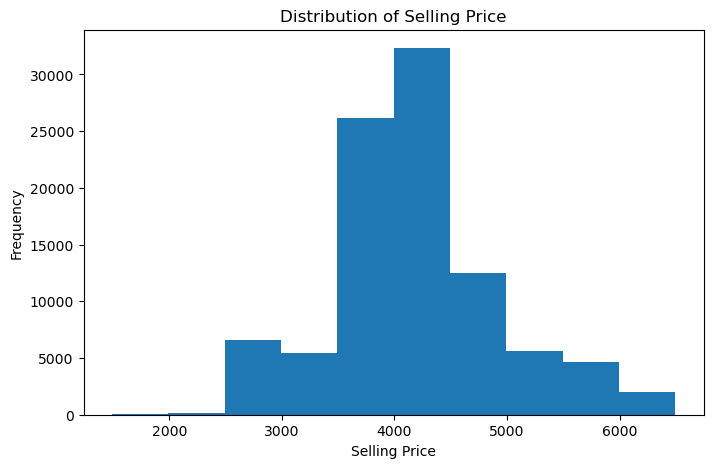

In [16]:
#Identify the most selling price
plt.figure(figsize=(8,5))
plt.hist(df["SELLING PRICE"], bins=10)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Price")
plt.show()

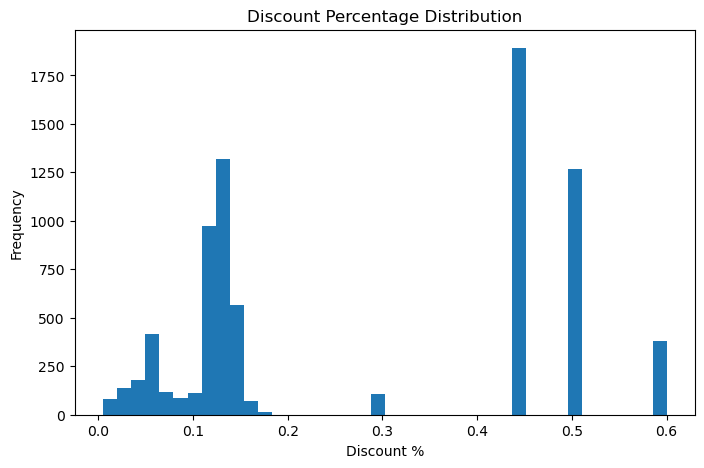

In [17]:
#To Identify the Discount Percentage Distribution
plt.figure(figsize=(8,5))

plt.hist(
    df.loc[df["DISCOUNT_PCT"] > 0, "DISCOUNT_PCT"],
    bins=40
)

plt.xlabel("Discount %")
plt.ylabel("Frequency")
plt.title("Discount Percentage Distribution")
plt.show()

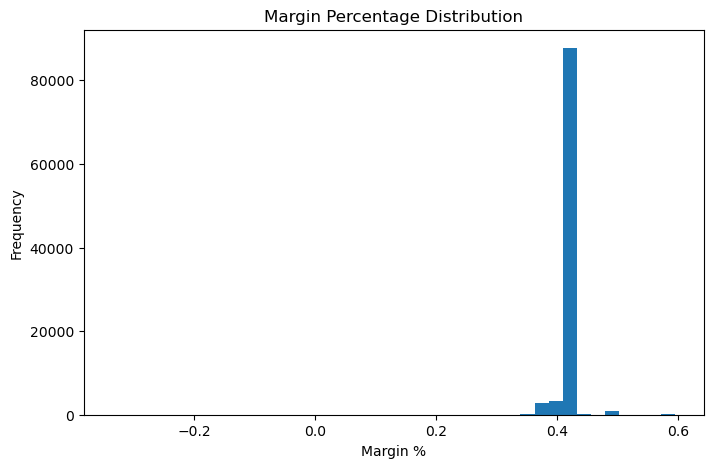

In [18]:
#To Identify the Margin Percentage Distribution
plt.figure(figsize=(8,5))
plt.hist(df["MARGIN_PCT"], bins=40)
plt.xlabel("Margin %")
plt.ylabel("Frequency")
plt.title("Margin Percentage Distribution")
plt.show()

## Price–Demand Pattern, detect basic elasticity

In [19]:
# GROUPING PRICES

price_bins = [0, 1000, 2000, 3000, 4000, 5000, np.inf]
price_labels = [
    "0–1000",
    "1000–2000",
    "2000–3000",
    "3000–4000",
    "4000–5000",
    "5000+"
]

df["PRICE_RANGE"] = pd.cut(
    df["SELLING PRICE"],
    bins=price_bins,
    labels=price_labels,
    include_lowest=True
)

price_range_summary = (
    df.groupby("PRICE_RANGE")
      .agg(
          Total_Quantity_Sold=("QTY", "sum"),
          Total_Gross_Amount=("GROSS AMOUNT", "sum"),
          Total_Net_Amount=("NET AMOUNT", "sum")
      )
      .reset_index()
)

# Calculate Average Price correctly
price_range_summary["Avg_Price"] = (
    price_range_summary["Total_Gross_Amount"] /
    price_range_summary["Total_Quantity_Sold"]
)

price_range_summary


C:\Users\marut\AppData\Local\Temp\ipykernel_34708\2187414652.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("PRICE_RANGE")


,PRICE_RANGE,Total_Quantity_Sold,Total_Gross_Amount,Total_Net_Amount,Avg_Price
0,0–1000,0,0,0,NaN
1,1000–2000,155,283795,283795,1830.935484
2,2000–3000,13161,37584485,36696998,2855.746904
3,3000–4000,100847,380862465,374885152,3776.636539
4,4000–5000,44226,200622070,196710760,4536.292452
5,5000+,11012,62053340,61075940,5635.065383


C:\Users\marut\AppData\Local\Temp\ipykernel_34708\1407711374.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("PRICE_RANGE")["QTY"]


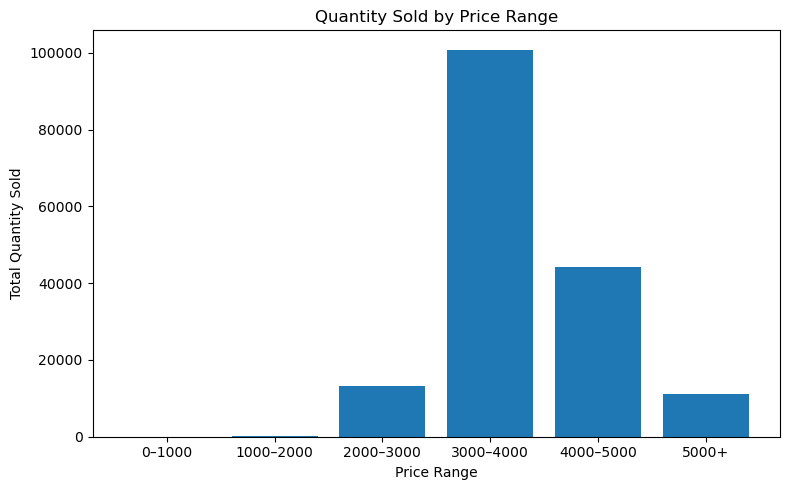

In [20]:
price_range_qty = (
    df.groupby("PRICE_RANGE")["QTY"]
      .sum()
      .reset_index()
)
plt.figure(figsize=(8,5))

plt.bar(
    price_range_qty["PRICE_RANGE"].astype(str),
    price_range_qty["QTY"]
)

plt.xlabel("Price Range")
plt.ylabel("Total Quantity Sold")
plt.title("Quantity Sold by Price Range")

plt.tight_layout()
plt.show()

C:\Users\marut\AppData\Local\Temp\ipykernel_34708\3266245695.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["YEAR", "PRICE_RANGE"])["QTY"]


<Figure size 1000x600 with 0 Axes>

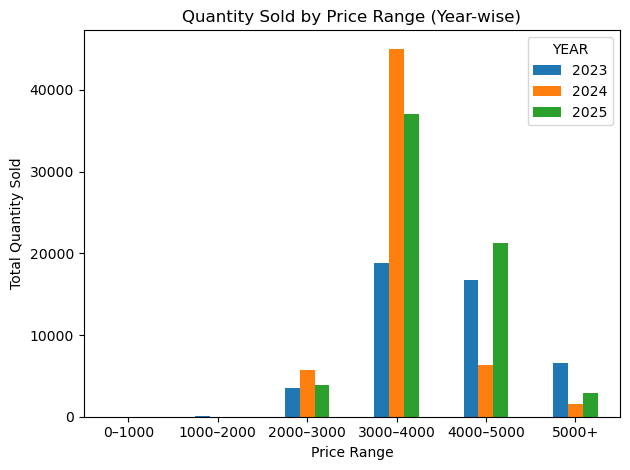

In [21]:
df["YEAR"] = df["DATE"].dt.year
price_range_year_qty = (
    df.groupby(["YEAR", "PRICE_RANGE"])["QTY"]
      .sum()
      .reset_index()
)
pivot_qty = price_range_year_qty.pivot(
    index="PRICE_RANGE",
    columns="YEAR",
    values="QTY"
)

plt.figure(figsize=(10,6))
pivot_qty.plot(kind="bar")

plt.xlabel("Price Range")
plt.ylabel("Total Quantity Sold")
plt.title("Quantity Sold by Price Range (Year-wise)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

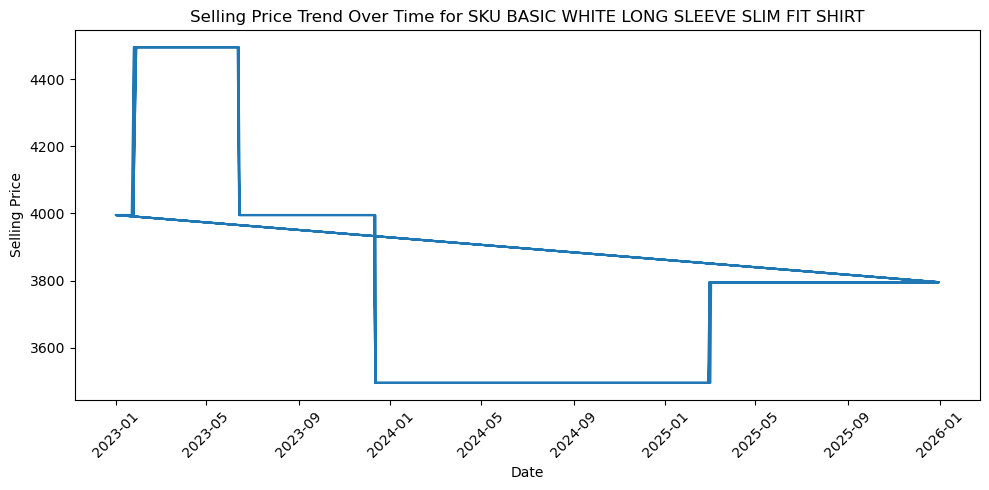

In [ ]:
sku_id = df["UNIQUE"].iloc[0]  
sku_df = df[df["UNIQUE"] == sku_id]

plt.figure(figsize=(10,5))

plt.plot(
    sku_df["DATE"],
    sku_df["SELLING PRICE"]
)

plt.xlabel("Date")
plt.ylabel("Selling Price")
plt.title(f"Selling Price Trend Over Time for SKU {sku_id}")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time & seasonality:	Capture seasonal

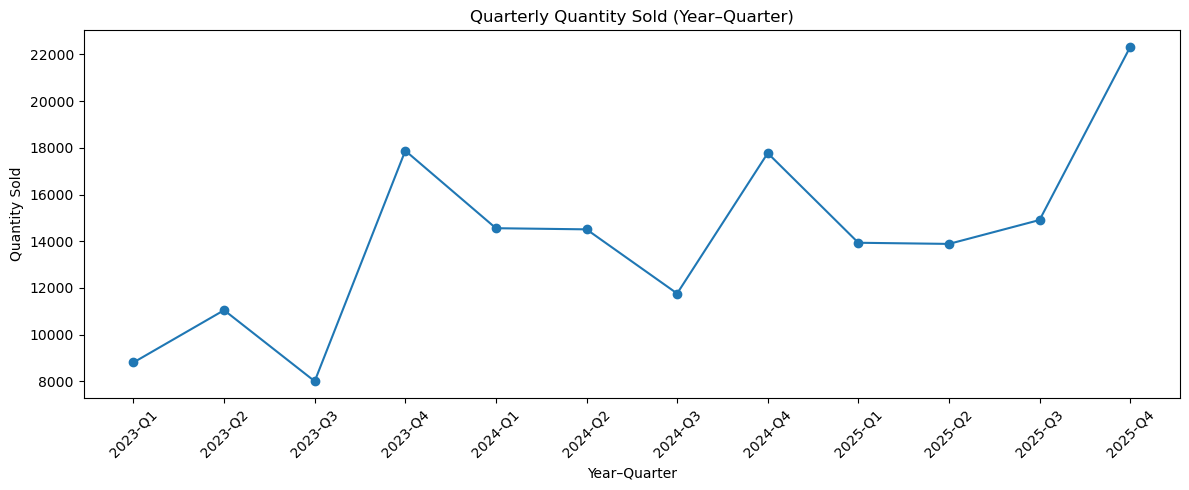

In [24]:
# Revenue
df["REVENUE"] = df["GROSS AMOUNT"]

# Average Selling Price per transaction
df["ASP"] = df["REVENUE"] / df["QTY"]

# Quarterly aggregation (Year–Quarter)
quarterly_ts = (
    df.set_index("DATE")
      .resample("Q")
      .agg(
          QTY_Sold=("QTY", "sum"),
          Revenue=("REVENUE", "sum"),
      )
      .reset_index()
)

# Create Year-Quarter label (for clear categories)
quarterly_ts["YEAR_QUARTER"] = (
    quarterly_ts["DATE"].dt.year.astype(str)
    + "-Q"
    + quarterly_ts["DATE"].dt.quarter.astype(str)
)

# Plot: Quantity Sold by Year-Quarter
plt.figure(figsize=(12,5))
plt.plot(
    quarterly_ts["YEAR_QUARTER"],
    quarterly_ts["QTY_Sold"],
    marker="o"
)

plt.title("Quarterly Quantity Sold (Year–Quarter)")
plt.xlabel("Year–Quarter")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

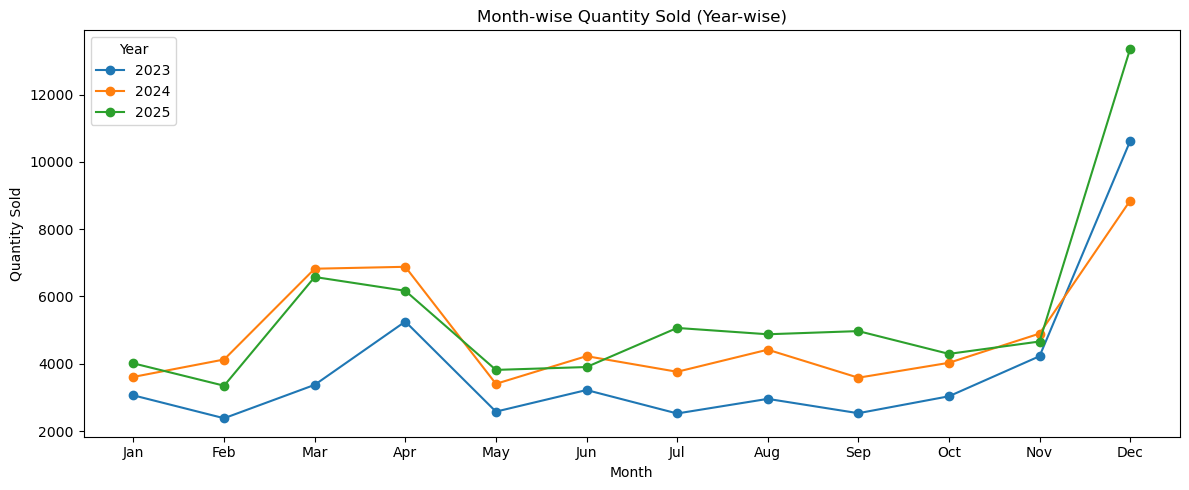

In [25]:
# Create YEAR and MONTH
df["YEAR"] = df["DATE"].dt.year
df["MONTH"] = df["DATE"].dt.month

# Aggregate quantity month-wise, year-wise
monthly_year_qty = (
    df.groupby(["YEAR", "MONTH"])
      .agg(QTY_Sold=("QTY", "sum"))
      .reset_index()
)

# Plot
plt.figure(figsize=(12,5))

for year in monthly_year_qty["YEAR"].unique():
    year_data = monthly_year_qty[monthly_year_qty["YEAR"] == year]
    plt.plot(
        year_data["MONTH"],
        year_data["QTY_Sold"],
        marker="o",
        label=str(year)
    )

plt.title("Month-wise Quantity Sold (Year-wise)")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(
    ticks=range(1, 13),
    labels=["Jan","Feb","Mar","Apr","May","Jun",
            "Jul","Aug","Sep","Oct","Nov","Dec"]
)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

In [26]:
# Extract Month and Month Name
df["Month"] = df["DATE"].dt.month
df["Month_Name"] = df["DATE"].dt.month_name()

# Aggregate total QTY, Revenue per month across all years
seasonality_table = (
    df.groupby("Month_Name")
      .agg(
          Total_Qty=("QTY", "sum"),
          Total_Revenue=("REVENUE", "sum")
      )
      .reindex([
          "January","February","March","April","May","June",
          "July","August","September","October","November","December"
      ])
)

# Divide totals by 3 (number of years) → average per year per month
seasonality_table["Avg_Qty"] = (seasonality_table["Total_Qty"] / 3).round().astype(int)
seasonality_table["Avg_Revenue"] = (seasonality_table["Total_Revenue"] / 3).round().astype(int)

# ASP = Revenue ÷ QTY in that month
seasonality_table["ASP"] = (seasonality_table["Avg_Revenue"] / seasonality_table["Avg_Qty"]).round(2).astype(int)

# Format Avg_Qty and Avg_Revenue with commas
seasonality_table["Avg_Qty"] = seasonality_table["Avg_Qty"].apply(lambda x: f"{x:,}")
seasonality_table["Avg_Revenue"] = seasonality_table["Avg_Revenue"].apply(lambda x: f"{x:,}")

# Keep only needed columns
seasonality_table = seasonality_table[["Avg_Qty", "Avg_Revenue", "ASP"]]

seasonality_table

,Avg_Qty,Avg_Revenue,ASP
Month_Name,,,
January,"3,560","14,368,933",4036
February,"3,284","13,408,612",4083
March,"5,592","22,046,575",3942
April,"6,101","24,984,795",4095
May,"3,266","13,487,038",4129
June,"3,782","15,388,788",4068
July,"3,782","15,066,653",3983
August,"4,083","16,368,183",4008
September,"3,695","14,870,792",4024


## Product lifecycle:	Understand Products Performance

C:\Users\marut\AppData\Local\Temp\ipykernel_34708\2026354846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["REVENUE"] = df["GROSS AMOUNT"]
C:\Users\marut\AppData\Local\Temp\ipykernel_34708\2026354846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ASP"] = df["REVENUE"] / df["QTY"]
C:\Users\marut\AppData\Local\Temp\ipykernel_34708\2026354846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

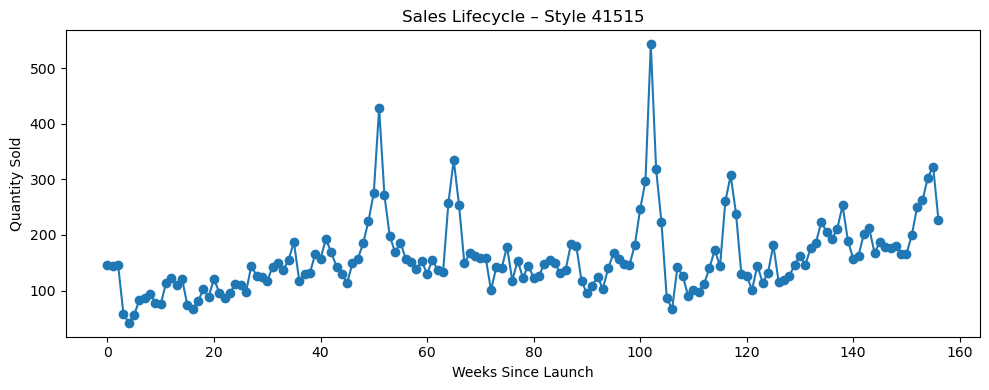

In [49]:
# Revenue and ASP
df["REVENUE"] = df["GROSS AMOUNT"]
df["ASP"] = df["REVENUE"] / df["QTY"]

# Launch date per product
df["LAUNCH_DATE"] = df.groupby("PATTERN")["DATE"].transform("min")

# Days and weeks since launch
df["DAYS_SINCE_LAUNCH"] = (df["DATE"] - df["LAUNCH_DATE"]).dt.days
df["WEEKS_SINCE_LAUNCH"] = df["DAYS_SINCE_LAUNCH"] // 7

# Weekly lifecycle aggregation
lifecycle_weekly = (
    df.groupby(["PATTERN", "WEEKS_SINCE_LAUNCH"])
      .agg(
          QTY_SOLD=("QTY", "sum"),
          AVG_ASP=("ASP", "mean"),
          REVENUE=("REVENUE", "sum")
      )
      .reset_index()
)

pattern_id = 41515

# Filter for selected pattern
style_df = lifecycle_weekly[lifecycle_weekly["PATTERN"] == pattern_id]

# Check if pattern exists
if style_df.empty:
    print(f"No data found for PATTERN '{pattern_id}'")
else:
    # Plot lifecycle
    plt.figure(figsize=(10,4))
    plt.plot(style_df["WEEKS_SINCE_LAUNCH"], style_df["QTY_SOLD"], marker="o")
    plt.xlabel("Weeks Since Launch")
    plt.ylabel("Quantity Sold")
    plt.title(f"Sales Lifecycle – Style {pattern_id}")
    plt.tight_layout()
    plt.show()

In [43]:
# Discount percentage
df["DISCOUNT_PCT"] = df["DISCOUNT AMOUNT"] / df["GROSS AMOUNT"]

def lifecycle_stage(row):
    if row["WEEKS_SINCE_LAUNCH"] <= 4:
        return "Launch"
    elif row["DISCOUNT_PCT"] == 0:
        return "Full Price"
    elif 0.01 <= row["DISCOUNT_PCT"] <= 0.25:
        return "Markdown"
    else:
        return "Clearance"

df["LIFECYCLE_STAGE"] = df.apply(lifecycle_stage, axis=1)

In [44]:
lifecycle_summary = (
    df.groupby([ "LIFECYCLE_STAGE"])
      .agg(
          Avg_ASP=("ASP", "mean"),
          Total_Units=("QTY", "sum"),
          Total_Revenue=("REVENUE", "sum"),
          Weeks_Active=("WEEKS_SINCE_LAUNCH", "nunique")
      )
      .reset_index()
)

lifecycle_summary

,LIFECYCLE_STAGE,Avg_ASP,Total_Units,Total_Revenue,Weeks_Active
0,Clearance,3986.543514,5035,20111725,106
1,Full Price,4047.391132,111962,447767655,151
2,Launch,4120.096526,48170,196539845,5
3,Markdown,4115.511762,4234,16986930,65


# FEATURE ENGINEERING

In [ ]:
%pip install holidays

import holidays

# --- Basic time features ---
df["DAY_OF_WEEK"] = df["DATE"].dt.dayofweek      
df["DAY_NAME"] = df["DATE"].dt.day_name()       
df["MONTH"] = df["DATE"].dt.month
df["MONTH_NAME"] = df["DATE"].dt.month_name()
df["QUARTER"] = df["DATE"].dt.quarter
df["WEEK_OF_YEAR"] = df["DATE"].dt.isocalendar().week

# --- Weekend flag ---
df["IS_WEEKEND"] = df["DAY_OF_WEEK"].isin([5,6]).astype(int)  # Saturday=5, Sunday=6

# --- Holiday flag 
sl_holidays = holidays.SriLanka(years=df["DATE"].dt.year.unique()) 
df["IS_HOLIDAY"] = df["DATE"].isin(sl_holidays).astype(int)

# --- Quick check ---
df[[
    "DATE",
    "DAY_OF_WEEK",
    "DAY_NAME",
    "MONTH",
    "MONTH_NAME",
    "QUARTER",
    "WEEK_OF_YEAR",
    "IS_WEEKEND",
    "IS_HOLIDAY"
]].head(20)

,DATE,DAY_OF_WEEK,DAY_NAME,MONTH,MONTH_NAME,QUARTER,WEEK_OF_YEAR,IS_WEEKEND,IS_HOLIDAY
12420,2023-02-14,1,Tuesday,2,February,1,7,0,0
12411,2023-03-23,3,Thursday,3,March,1,12,0,0
12412,2023-02-28,1,Tuesday,2,February,1,9,0,0
12413,2023-03-12,6,Sunday,3,March,1,10,1,0
12414,2023-03-13,0,Monday,3,March,1,11,0,0
12415,2023-03-17,4,Friday,3,March,1,11,0,0
12416,2023-04-06,3,Thursday,4,April,2,14,0,0
12417,2023-04-24,0,Monday,4,April,2,17,0,0
12453,2023-01-10,1,Tuesday,1,January,1,2,0,0
13100,2023-01-21,5,Saturday,1,January,1,3,1,0


In [33]:
# Launch date = first date product sold
df["LAUNCH_DATE"] = df.groupby("PATTERN")["DATE"].transform("min")

# Time since launch
df["DAYS_SINCE_LAUNCH"] = (df["DATE"] - df["LAUNCH_DATE"]).dt.days
df["WEEKS_SINCE_LAUNCH"] = df["DAYS_SINCE_LAUNCH"] // 7

# Lifecycle stage
df["LIFECYCLE_STAGE"] = pd.cut(
    df["WEEKS_SINCE_LAUNCH"],
    bins=[-1, 4, 12, 26, 1000],
    labels=["Launch", "Growth", "Maturity", "Decline"]
)

df[[
    "PATTERN",
    "DATE",
    "LAUNCH_DATE",
    "DAYS_SINCE_LAUNCH",
    "WEEKS_SINCE_LAUNCH",
    "LIFECYCLE_STAGE"
]].head(10)

,PATTERN,DATE,LAUNCH_DATE,DAYS_SINCE_LAUNCH,WEEKS_SINCE_LAUNCH,LIFECYCLE_STAGE
0,41515,2023-01-01,2023-01-01,0,0,Launch
1,41515,2023-01-02,2023-01-01,1,0,Launch
2,41515,2023-01-03,2023-01-01,2,0,Launch
3,41515,2023-01-07,2023-01-01,6,0,Launch
4,41515,2023-01-08,2023-01-01,7,1,Launch
5,41515,2023-01-11,2023-01-01,10,1,Launch
6,41515,2023-01-13,2023-01-01,12,1,Launch
7,41515,2023-01-16,2023-01-01,15,2,Launch
8,41515,2023-01-17,2023-01-01,16,2,Launch
9,41515,2023-01-19,2023-01-01,18,2,Launch


In [34]:
# Price changes
df = df.sort_values(["PATTERN", "DATE"])
df["PRICE_LAG"] = df.groupby("PATTERN")["SELLING PRICE"].shift(1)
df["PRICE_CHANGE_PCT"] = (
    (df["SELLING PRICE"] - df["PRICE_LAG"]) / df["PRICE_LAG"]
)
df["PRICE_CHANGED"] = df["PRICE_CHANGE_PCT"].notna().astype(int)

df[[
    "PATTERN",
    "DATE",
    "SELLING PRICE",
    "PRICE_LAG",
    "PRICE_CHANGE_PCT",
    "PRICE_CHANGED"
]].head(15)

,PATTERN,DATE,SELLING PRICE,PRICE_LAG,PRICE_CHANGE_PCT,PRICE_CHANGED
12420,15117,2023-02-14,1795,NaN,NaN,0
12411,15127,2023-03-23,1795,NaN,NaN,0
12412,15136,2023-02-28,1795,NaN,NaN,0
12413,15136,2023-03-12,1795,1795.0,0.0,1
12414,15136,2023-03-13,1795,1795.0,0.0,1
12415,15136,2023-03-17,1795,1795.0,0.0,1
12416,15136,2023-04-06,1795,1795.0,0.0,1
12417,15136,2023-04-24,1795,1795.0,0.0,1
12453,15139,2023-01-10,1795,NaN,NaN,0
13100,15147,2023-01-21,1795,NaN,NaN,0


In [35]:
df["QTY_LAG"] = df.groupby("PATTERN")["QTY"].shift(1)
df["QTY_CHANGE_PCT"] = (df["QTY"] - df["QTY_LAG"]) / df["QTY_LAG"]

df["ELASTICITY_PROXY"] = (
    df["QTY_CHANGE_PCT"] / df["PRICE_CHANGE_PCT"]
)
df[[
    "PATTERN",
    "DATE",
    "QTY",
    "QTY_LAG",
    "QTY_CHANGE_PCT",
    "PRICE_CHANGE_PCT",
    "ELASTICITY_PROXY"
]].head(20)

,PATTERN,DATE,QTY,QTY_LAG,QTY_CHANGE_PCT,PRICE_CHANGE_PCT,ELASTICITY_PROXY
12420,15117,2023-02-14,1,NaN,NaN,NaN,NaN
12411,15127,2023-03-23,1,NaN,NaN,NaN,NaN
12412,15136,2023-02-28,1,NaN,NaN,NaN,NaN
12413,15136,2023-03-12,1,1.0,0.000000,0.0,NaN
12414,15136,2023-03-13,2,1.0,1.000000,0.0,inf
12415,15136,2023-03-17,1,2.0,-0.500000,0.0,-inf
12416,15136,2023-04-06,1,1.0,0.000000,0.0,NaN
12417,15136,2023-04-24,1,1.0,0.000000,0.0,NaN
12453,15139,2023-01-10,1,NaN,NaN,NaN,NaN
13100,15147,2023-01-21,1,NaN,NaN,NaN,NaN
